# Task 4

Download the dataset from https://drive.google.com/file/d/1ndCMh6mJ5LiO805cc3Q77K4p6hz7yEsV/view?usp=sharing The above link contains folder containing two images. Perform all the following tasks on both of the images. After performing each task display the image in the python notebook.

    1 - Image Loading:

    Load an image from your local system using OpenCV.
    Color Space Conversion

    2 - Convert the image to grayscale and display it.

    Convert the grayscale image to a different color space (e.g., HSV) and display it.

    3 - Image Filtering:

    Apply Gaussian Blur to the original color image and display the result.
    Apply a custom kernel for image smoothing (e.g., averaging) and display the result.

    4 - Edge Detection:

    Apply Canny edge detection to the grayscale image and display the edges.

    5 - Contours:

    Find and draw contours on the original image based on the edges obtained from Canny.

    6 - Histogram:

    Compute and display the histogram of the grayscale image.

    7 - Object Detection:

    Load a pre-trained object detection model and apply it to detect cars in the image. (In case of humans detect faces else detect the object present in the image)

    8 - Save Results

In [112]:
import cv2
import matplotlib.pyplot as plt

original images

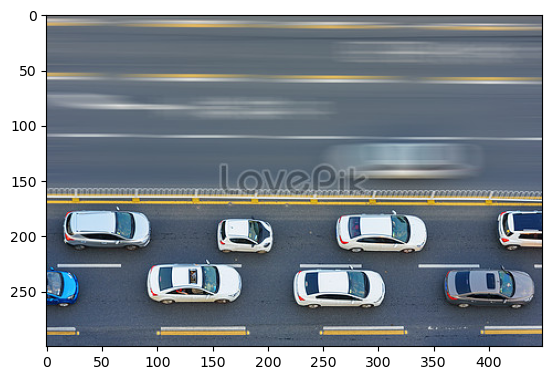

In [113]:
cars = cv2.imread('datasets/images/cars.jpg')
plt.imshow(cv2.cvtColor(cars,cv2.COLOR_BGR2RGB))

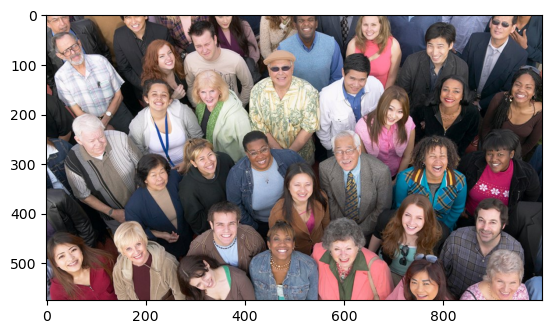

In [114]:
humans = cv2.imread('datasets/images/humans.jpg')
plt.imshow(cv2.cvtColor(humans,cv2.COLOR_BGR2RGB))

grayscale image

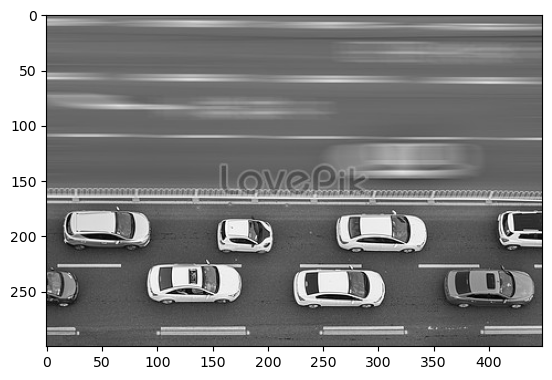

In [115]:
gray_cars = cv2.cvtColor(cars,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_cars,cv2.COLOR_BGR2RGB))

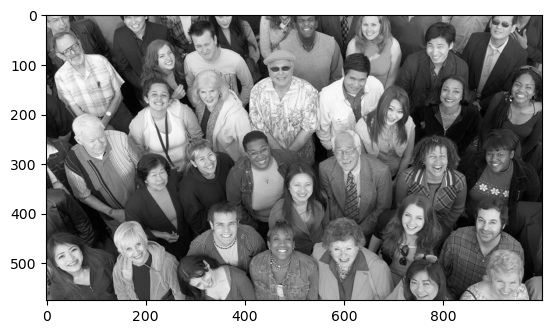

In [116]:
gray_humans = cv2.cvtColor(humans,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_humans,cv2.COLOR_BGR2RGB))

gaussian blur

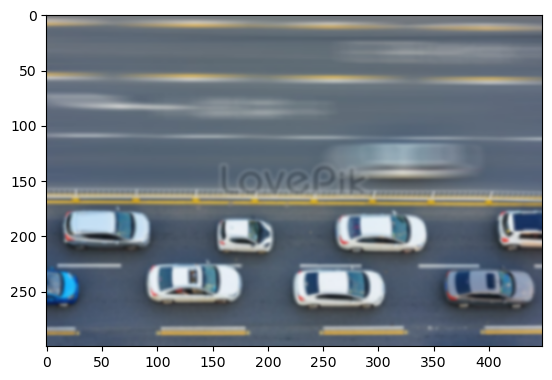

In [117]:
gaussian_cars = cv2.GaussianBlur(cars, (7, 7), 0)
plt.imshow(cv2.cvtColor(gaussian_cars,cv2.COLOR_BGR2RGB))

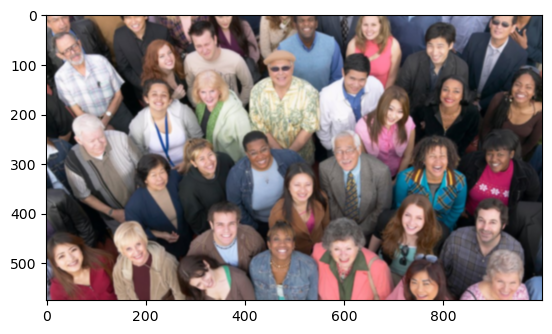

In [118]:
gaussian_humans = cv2.GaussianBlur(humans, (7, 7), 0)
plt.imshow(cv2.cvtColor(gaussian_humans,cv2.COLOR_BGR2RGB))

image smoothing

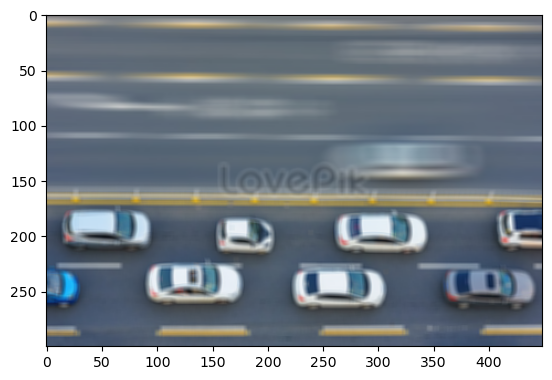

In [119]:
averageblur_cars = cv2.blur(cars, (5, 5))
plt.imshow(cv2.cvtColor(averageblur_cars,cv2.COLOR_BGR2RGB))

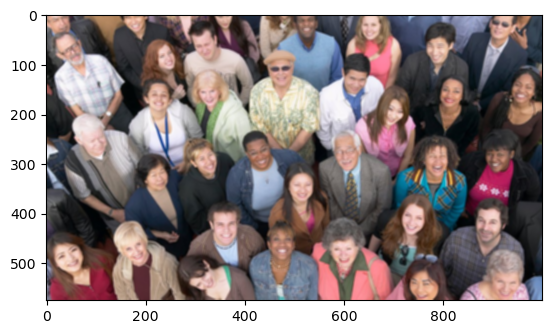

In [120]:
averageblur_humans = cv2.blur(humans, (5, 5))
plt.imshow(cv2.cvtColor(averageblur_humans,cv2.COLOR_BGR2RGB))

edge detection

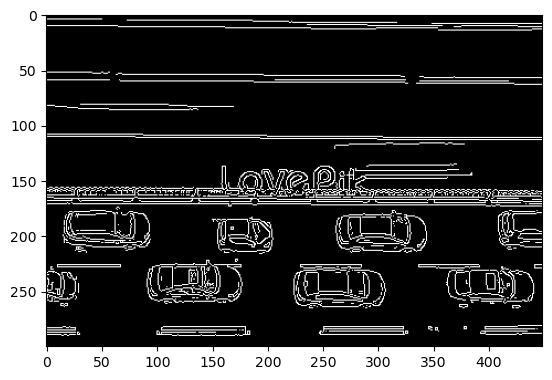

In [121]:
bfilter = cv2.bilateralFilter(gray_cars, 11, 17, 17) # noise reduction
edged_cars = cv2.Canny(bfilter,30,200) # edge detection
plt.imshow(cv2.cvtColor(edged_cars,cv2.COLOR_BGR2RGB))

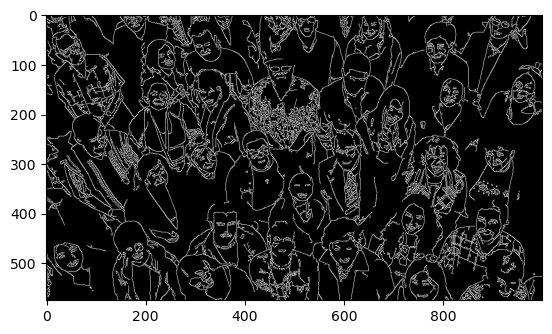

In [122]:
bfilter = cv2.bilateralFilter(gray_humans, 11, 17, 17) # noise reduction
edged_humans = cv2.Canny(bfilter,30,200) # edge detection
plt.imshow(cv2.cvtColor(edged_humans,cv2.COLOR_BGR2RGB))

finding contours

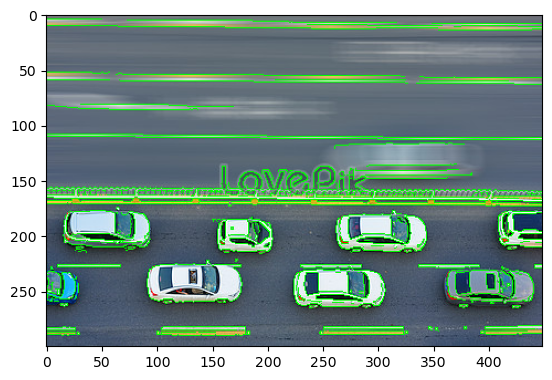

In [123]:
contours, hierarchy = cv2.findContours(edged_cars,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(cars, contours, -1, (0, 255, 0), 1) 
plt.imshow(cv2.cvtColor(cars,cv2.COLOR_BGR2RGB))

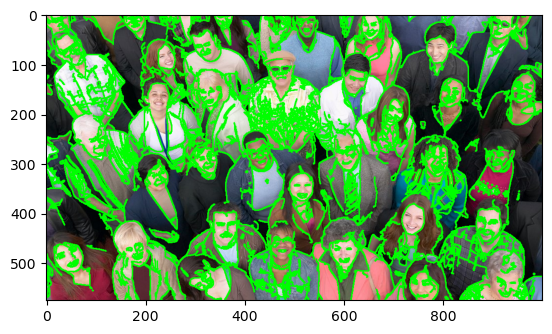

In [124]:
contours, hierarchy = cv2.findContours(edged_humans,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(humans, contours, -1, (0, 255, 0), 2) 
plt.imshow(cv2.cvtColor(humans,cv2.COLOR_BGR2RGB))

histogram

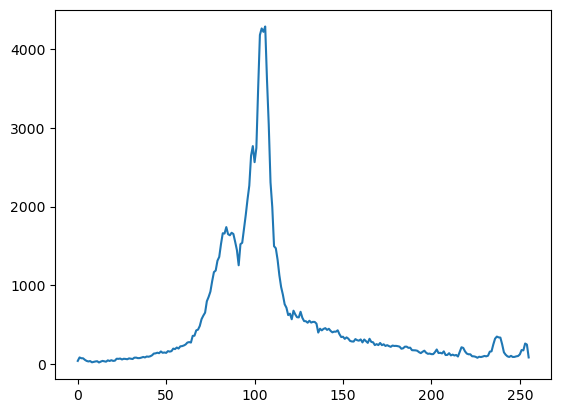

In [127]:
hist_cars = cv2.calcHist([gray_cars],[0],None,[256],[0,256]) 
plt.plot(hist_cars)

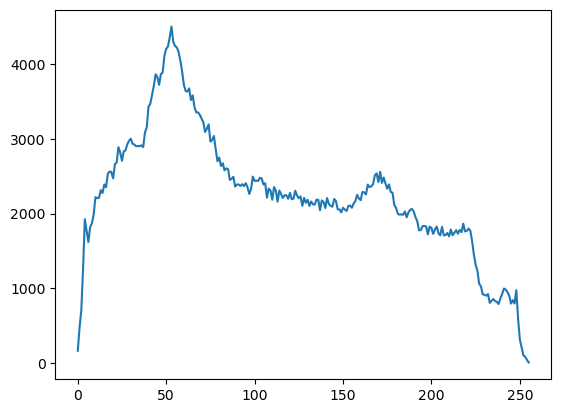

In [128]:
hist_humans = cv2.calcHist([gray_humans],[0],None,[256],[0,256]) 
plt.plot(hist_humans)

detection

In [135]:
from ultralytics import YOLO

In [151]:
model = YOLO('weights/yolov8n.pt')

In [152]:
result_cars = model('datasets/images/cars.jpg',save=True)

Ultralytics YOLOv8.0.3 🚀 Python-3.11.4 torch-2.1.1+cu121 CPU
Fusing layers... 
YOLOv8n summary: 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
image 1/1 /home/dravidvaishnav/dravid/webelight/datasets/images/cars.jpg: 448x640 7 cars, 2 boats, 68.5ms
Speed: 0.6ms pre-process, 68.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


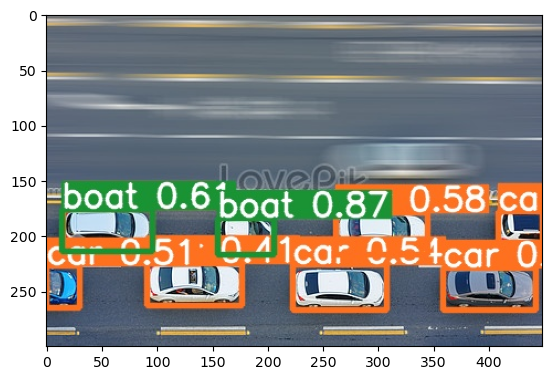

In [153]:
detected_cars = cv2.imread('runs/detect/predict/cars.jpg')
plt.imshow(cv2.cvtColor(detected_cars,cv2.COLOR_BGR2RGB))

In [154]:
result_humans = model('datasets/images/humans.jpg',save=True)

Ultralytics YOLOv8.0.3 🚀 Python-3.11.4 torch-2.1.1+cu121 CPU
Fusing layers... 
YOLOv8n summary: 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
image 1/1 /home/dravidvaishnav/dravid/webelight/datasets/images/humans.jpg: 384x640 29 persons, 2 ties, 67.6ms
Speed: 1.1ms pre-process, 67.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


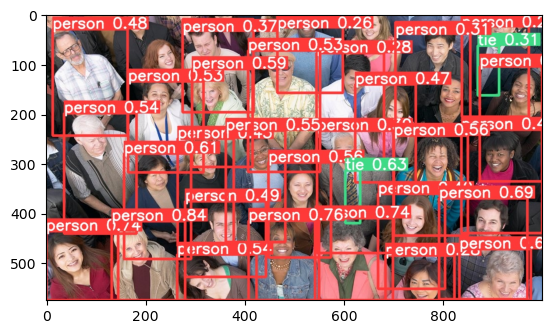

In [155]:
detected_humans = cv2.imread('runs/detect/predict2/humans.jpg')
plt.imshow(cv2.cvtColor(detected_humans,cv2.COLOR_BGR2RGB))